# $$\text{Projeto na Frequência:}$$

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

### $$\text{Definição do sistema:}$$

In [2]:
s = ct.tf('s')

G = (6/(s*((10*s)+1)))

G

TransferFunction(array([6]), array([10,  1,  0]))

### $$\text{Encontrar } k \text{ para ajuste do erro de regime permanente:}$$

In [3]:
#Cálculo do erro sem compensação:
kva = ct.dcgain(ct.minreal(s*G, verbose=False))
eva = 1/kva
print(f'kva={kva} \t', f'eva={eva}')

#Erro desejado:
evd = 0.05

#Cálculo do ganho que ajusta para esse erro:
k = (eva/evd)

k

kva=6.0 	 eva=0.16666666666666666


3.333333333333333

### $$\text{Obter a margem de fase:}$$

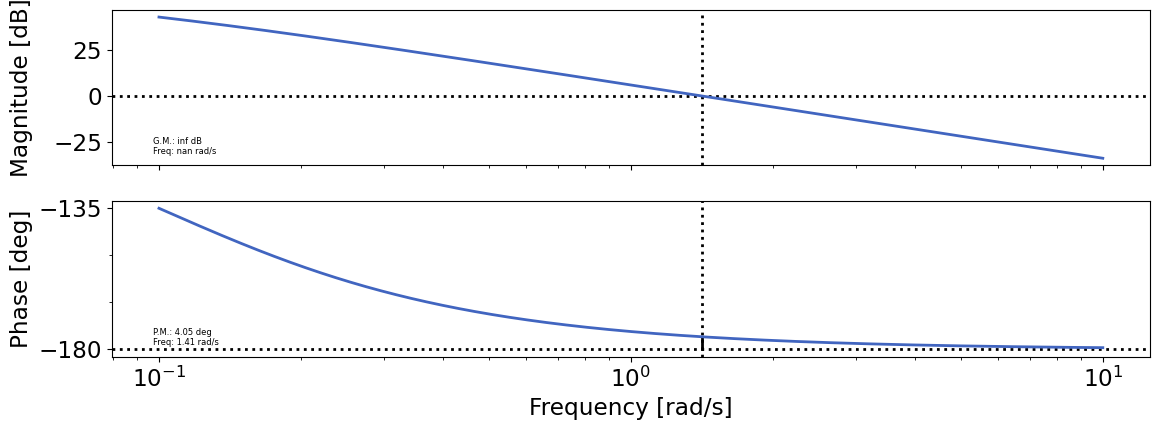

In [4]:
lims = [1e-1, 1e1]
_ = ct.bode_plot(ct.frequency_response(k*G, omega_limits=lims), sharex=True, dB=True, display_margins='overlay', title='')
mf = ct.margin(k*G)[1]

### $$\text{Obter a contribuição de fase que o controlador deve fornecer:}$$

In [5]:
#Cálculo da margem de fase desejada via amortecimento ou overshoot:
os = 0.25
zeta = (-np.log(os)/np.sqrt((np.pi**2)+(np.log(os)**2)))
print(f'zeta = {zeta:.4f}')
mfd = np.degrees(np.arctan((2*zeta)/np.sqrt((-2*(zeta**2))+np.sqrt(1+(4*(zeta**4))))))
print(f'mfd = {mfd:.4f}')

#Margem de fase desejada:
#mfd = 48

#Folga de fase:
folga = 10

#Contribuição de fase:
phi = mfd - mf + folga

phi

zeta = 0.4037
mfd = 43.4630


49.413273235515

### $$\text{Cálculo do } \alpha \text{ :}$$

In [6]:
alpha = ((1-np.sin(np.radians(phi)))/(1+np.sin(np.radians(phi))))

alpha

0.1367369211363024

### $$\text{Cálculo da magnitude correspondente à nova frequência de cruzamento } \omega_c \text{ :}$$

In [7]:
magwc = -20*np.log10(1/np.sqrt(alpha))

magwc

-8.641142032027513

### $$\text{Nova frequência de cruzamento do } 0~dB \quad (\omega_c) \text{ :}$$

In [8]:
mag,_,omega = ct.frequency_response(k*G, omega_limits=lims)

wc = omega[np.absolute(20*np.log10(mag)-magwc).argmin()]

wc

2.3193450592744287

### $$\text{Cálculo do parâmetro } T \text{ :}$$

In [9]:
T = (1/(np.sqrt(alpha)*wc))

T


1.16598170531742

### $$\text{Função de transferência do controlador projetado:}$$

In [10]:
kc = (k/alpha)
z = (1/T)
p = (1/(alpha*T))
print(f'kc = {kc}\t', f'z = {z}\t', f'p = {p}')

C = (kc*(s+z)/(s+p))

C

kc = 24.37771236643973	 z = 0.8576463896813594	 p = 6.2722370999303


TransferFunction(array([24.37771237, 20.907457  ]), array([1.       , 6.2722371]))

### $$\text{Conferir a margem de fase do ramo direto compensado:}$$

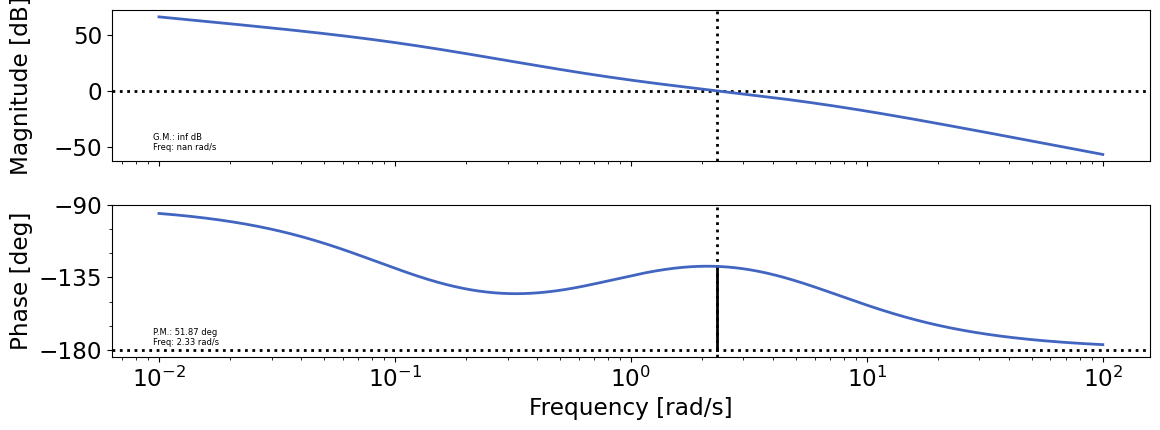

In [11]:
_ = ct.bode_plot(ct.frequency_response(C*G), sharex=True, dB=True, display_margins='overlay', title='')

### $$\text{Resposta do sistema compensado:}$$

{'RiseTime': 0.4777132366002027, 'SettlingTime': 3.1051360379013175, 'SettlingMin': 0.9229322005331587, 'SettlingMax': 1.2461730196084684, 'Overshoot': 24.617301960846852, 'Undershoot': 0, 'Peak': 1.2461730196084684, 'PeakTime': 1.2739019642672071, 'SteadyStateValue': 0.9999999999999999}
kp = inf
Erro de posição: 0.00%


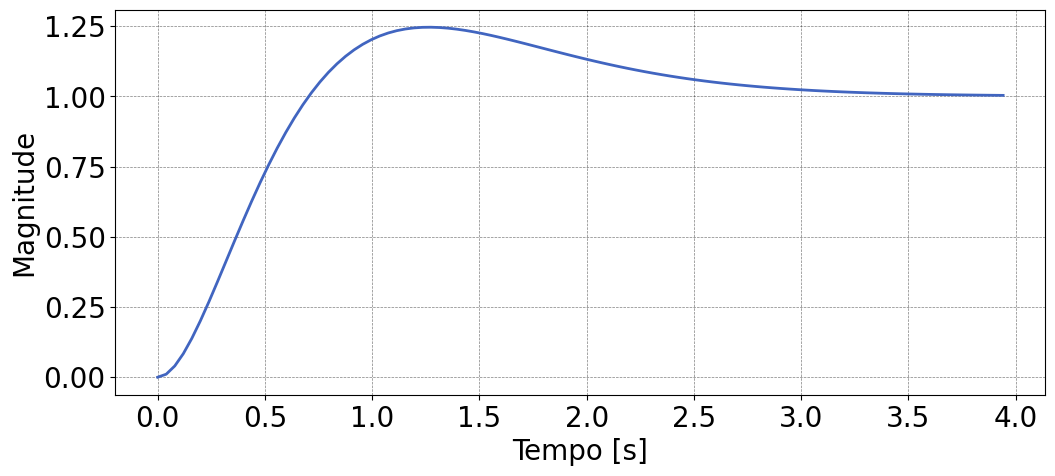

In [12]:
T = ct.feedback(C*G)
si = ct.step_info(T)
sol = ct.step_response(T)
print(si)
ep = (1-si['SteadyStateValue'])*100
kp = ct.dcgain(G)
print(f'kp = {kp:.2f}')
print(f'Erro de posição: {ep:.2f}%')

plt.figure()
plt.plot(sol[0], sol[1])
plt.ylabel('Magnitude')
plt.xlabel('Tempo [s]')
plt.show()

kv = 20.00
Erro de velocidade: 5.00%


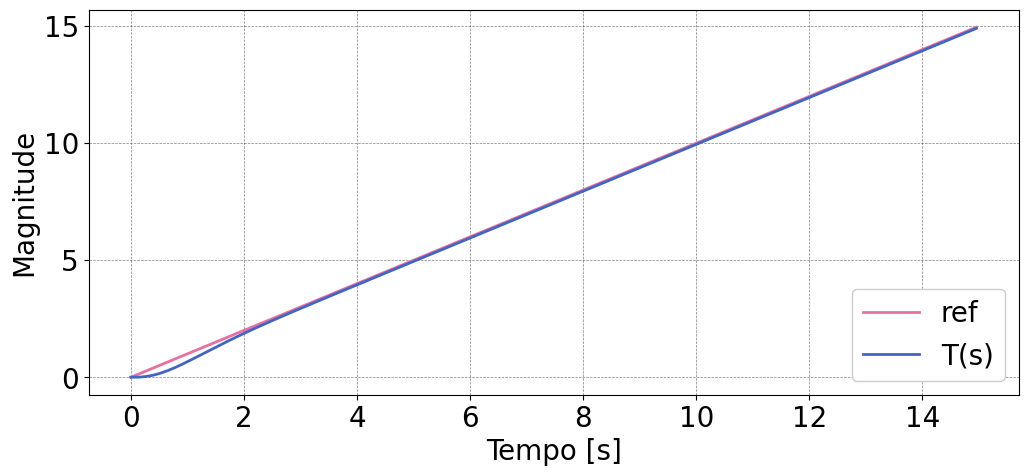

In [13]:
sol = ct.step_response(T/s)

kv = ct.dcgain(ct.minreal(C*G*s, verbose=False))
print(f'kv = {kv:.2f}')
print(f'Erro de velocidade: {100/kv:.2f}%')

plt.figure()
plt.plot(sol[0], sol[0], color='C1', label='ref')
plt.plot(sol[0], sol[1], label='T(s)')
plt.ylabel('Magnitude')
plt.xlabel('Tempo [s]')
plt.legend(loc='lower right')
plt.show()

In [14]:
ct.poles(T)

array([-2.30975214+1.34986644j, -2.30975214-1.34986644j,
       -1.75273282+0.j        ])

In [15]:
ct.zeros(T)

array([-0.85764639+0.j])